In [1]:
from Config import Config, plot_rewards
from Env import env_agent_config, all_seed
from Utils import test, train, to_tensor, plot, get_image_state
from Agent import Agent
import d2l.torch as d2l
import torch

In [2]:
# 获取参数
cfg = Config()
# 训练
env, agent = env_agent_config(cfg)
best_agent,res_dic = train(cfg, env, agent)
 
plot_rewards(res_dic['rewards'], cfg, tag="train")  
# 测试
res_dic = test(cfg, env, best_agent)
plot_rewards(res_dic['rewards'], cfg, tag="test")  # 画出结果

/home/wyq/anaconda3/lib/python3.9/site-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment Breakout-v4 is out of date. You should consider upgrading to version `v5` with the environment ID `ALE/Breakout-v5`.
  logger.warn(
A.L.E: Arcade Learning Environment (version +a7a216c)
[Powered by Stella]
/home/wyq/anaconda3/lib/python3.9/site-packages/gym/utils/seeding.py:138: DeprecationWarning: WARN: Function `hash_seed(seed, max_bytes)` is marked as deprecated and will be removed in the future. 
  deprecation(
/home/wyq/anaconda3/lib/python3.9/site-packages/gym/utils/seeding.py:175: DeprecationWarning: WARN: Function `_bigint_from_bytes(bytes)` is marked as deprecated and will be removed in the future. 
  deprecation(


状态空间维度：210，动作空间维度：4
开始训练！


/home/wyq/Workspace/AttentionRL/ImageAttentionPPO/Agent.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(state, device=self.device, dtype=torch.float32).unsqueeze(dim=0)
/home/wyq/anaconda3/lib/python3.9/site-packages/gym/utils/seeding.py:47: DeprecationWarning: WARN: Function `rng.randint(low, [high, size, dtype])` is marked as deprecated and will be removed in the future. Please use `rng.integers(low, [high, size, dtype])` instead.
  deprecation(
/home/wyq/Workspace/AttentionRL/ImageAttentionPPO/Agent.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(state, device=self.device, dtype=torch.float32).unsqueeze(dim=0)


回合：3/12，奖励：1.00，评估奖励：0.00，最佳评估奖励：0.00，更新模型！，动作次数：297 0.64


3 tensor([1.1982]) tensor([0.2722, 0.2408, 0.2441, 0.2429])
1 tensor([1.2022]) tensor([0.2722, 0.2408, 0.2441, 0.2429])
2 tensor([1.1890]) tensor([0.2722, 0.2408, 0.2441, 0.2429])
2 tensor([1.1962]) tensor([0.2722, 0.2408, 0.2441, 0.2429])
1 tensor([1.1944]) tensor([0.2722, 0.2408, 0.2441, 0.2429])
0 tensor([1.1906]) tensor([0.2722, 0.2408, 0.2441, 0.2429])
2 tensor([1.1919]) tensor([0.2722, 0.2408, 0.2441, 0.2429])
2 tensor([1.1981]) tensor([0.2722, 0.2408, 0.2441, 0.2429])
2 tensor([1.2093]) tensor([0.2723, 0.2406, 0.2441, 0.2430])
1 tensor([1.2123]) tensor([0.2723, 0.2406, 0.2441, 0.2430])
3 tensor([1.1846]) tensor([0.2723, 0.2406, 0.2441, 0.2430])
2 tensor([1.2146]) tensor([0.2723, 0.2406, 0.2441, 0.2430])
2 tensor([1.2139]) tensor([0.2723, 0.2406, 0.2441, 0.2430])
1 tensor([1.2137]) tensor([0.2723, 0.2406, 0.2441, 0.2430])
0 tensor([1.2113]) tensor([0.2723, 0.2406, 0.2441, 0.2430])
0 tensor([1.2152]) tensor([0.2723, 0.2406, 0.2441, 0.2430])
0 tensor([1.2136]) tensor([0.2723, 0.240

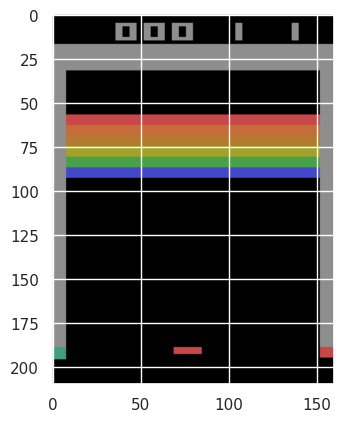

In [4]:
from IPython import display
import matplotlib.pyplot as plt
# cfg = Config() 
# env, agent = env_agent_config(cfg)
# draw_agent = agent
draw_agent = best_agent
draw_agent.actor.eval()
NUM_OF_TEST = 1
test_total_reward = []
action_list = []
actor_out = []
actions = []
critic_list = []
state_list = []
atten_std = []
for i in range(NUM_OF_TEST):
    state = env.reset()
    total_reward = 0
    done = False

    img = plt.imshow(env.render(mode='rgb_array'))
    while not done:
        state = get_image_state(state)
        action = draw_agent.predict_action(state)
        actor_out.append(draw_agent.actor(to_tensor(state, cfg).unsqueeze(0)))
        actions.append(action)
        critic_list.append(draw_agent.critic(to_tensor(state, cfg).unsqueeze(0)))
        state, reward, done, _ = env.step(action)
        atten_std.append(draw_agent.actor.atten.cpu().detach().numpy().std())

        total_reward += reward
        img.set_data(env.render(mode='rgb_array'))
        display.display(plt.gcf())
        display.clear_output(wait=True)

for i in range(len(actor_out)):
    print(actions[i],critic_list[i].detach().cpu()[0],actor_out[i].detach().cpu()[0])
draw_agent.actor.train()
print("length of actions is ", len(actions))


tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.000

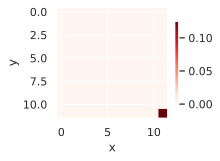

In [5]:
d2l.show_heatmaps(draw_agent.actor.atten.view(1, 1, 12, 12).cpu(), 'x', 'y')
draw_agent.actor.atten.view(1, 1, 12, 12).cpu()

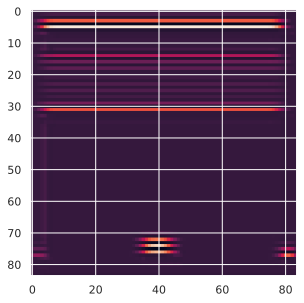

In [12]:
plt.imshow(best_agent.actor.state_net.conv_layers(state.unsqueeze(0).to('cuda')).cpu().detach().squeeze(0).squeeze(0).numpy())

In [6]:
state = get_image_state(state)